<a href="https://colab.research.google.com/github/Tipsy-12/RHODE-ISLAND/blob/main/RHODE_ISLAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving police_project.csv.zip to police_project.csv.zip


In [3]:
#importing files

import pandas as pd
df=pd.read_csv('police_project.csv.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [4]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# Handling Missing Data

In [5]:
# finding number of missing values in each column in the dataset:

df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
# % of missing values in each column in the dataset
for column in df.columns:
    missing = df[column].isna().sum() / df.shape[0]
    print(f"{column:{20}}: ==============> {missing * 100:.2f}%")

stop_date           : ==============> 0.00%
stop_time           : ==============> 0.00%
county_name         : ==============> 100.00%
driver_gender       : ==============> 5.82%
driver_age_raw      : ==============> 5.81%
driver_age          : ==============> 6.13%
driver_race         : ==============> 5.81%
violation_raw       : ==============> 5.81%
violation           : ==============> 5.81%
search_conducted    : ==============> 0.00%
search_type         : ==============> 96.52%
stop_outcome        : ==============> 5.81%
is_arrested         : ==============> 5.81%
stop_duration       : ==============> 5.81%
drugs_related_stop  : ==============> 0.00%


In [7]:
df.shape

(91741, 15)

All the data in the column **country_name** is missing. We will drop this column.

Only 5-6% of the data in the columns **driver_gender, driver_age_raw, driver_age, driver_race, violation_raw, violation, stop_outcome, is_arrested, and stop_duration** is missing. But pandas functions ignore missing values by default so its fine.



In [8]:
#Remove the column that only contains missing values
df.drop(['county_name'], axis=1, inplace=True) # Pass a list of columns to drop

df.isnull().sum()
df.shape

(91741, 14)

In [9]:
# Feature Construction
df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour
df['stop_day'] = pd.to_datetime(df['stop_date']).dt.day_name()
df['stop_month'] = pd.to_datetime(df['stop_date']).dt.month
df['is_weekend'] = df['stop_day'].isin(['Saturday', 'Sunday']).astype(int)
df['time_of_day'] = pd.cut(df['stop_hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['age_group'] = pd.cut(df['driver_age'],
                         bins=[0, 25, 35, 45, 55, 100],
                         labels=['Young', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

<ipython-input-9-89133c6fe505>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_hour'] = pd.to_datetime(df['stop_time']).dt.hour


#Univariate Analysis


In [10]:
# Numerical columns statistics
df.describe()

# Categorical columns frequency
categorical_cols = ['driver_gender', 'driver_race', 'violation', 'stop_outcome']
for col in categorical_cols:
    print(f"\nFrequency distribution for {col}:")
    print(df[col].value_counts(normalize=True))


Frequency distribution for driver_gender:
driver_gender
M    0.727901
F    0.272099
Name: proportion, dtype: float64

Frequency distribution for driver_race:
driver_race
White       0.719355
Black       0.141700
Hispanic    0.110025
Asian       0.026143
Other       0.002778
Name: proportion, dtype: float64

Frequency distribution for violation:
violation
Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: proportion, dtype: float64

Frequency distribution for stop_outcome:
stop_outcome
Citation            0.891191
Warning             0.061267
Arrest Driver       0.029754
N/D                 0.006828
No Action           0.006816
Arrest Passenger    0.004143
Name: proportion, dtype: float64


Data Visualization

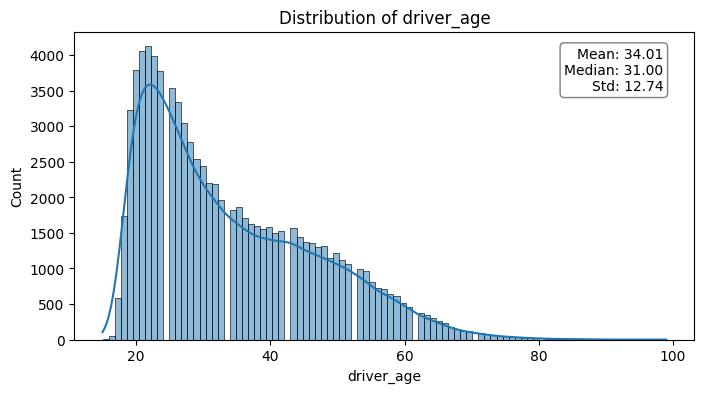

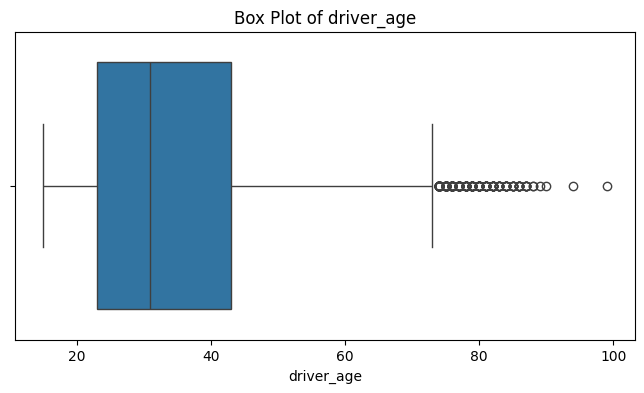

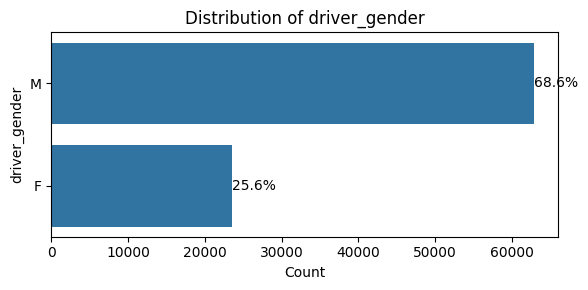

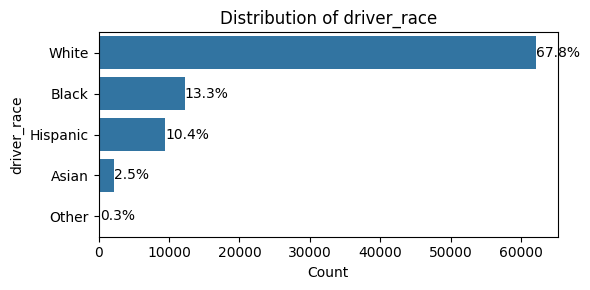

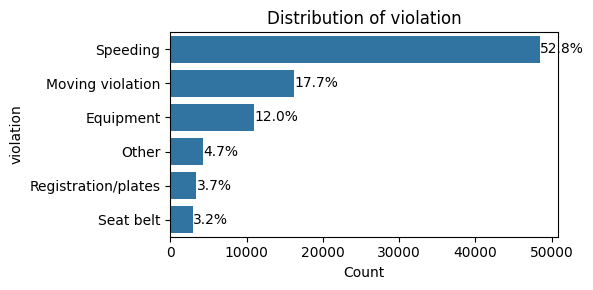

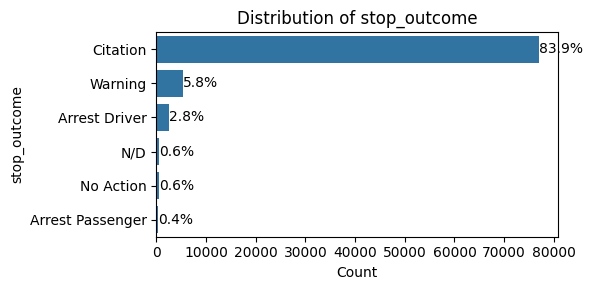

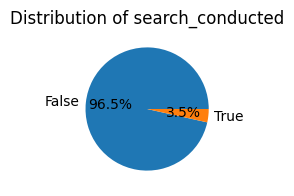

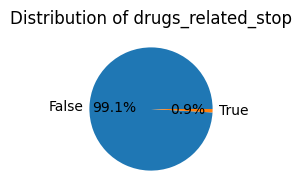

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Univariate Analysis

# 1. Numerical Variables
numerical_cols = ['driver_age']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))

    # Histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add descriptive statistics to the plot
    stats = df[col].describe()
    stats_text = f"Mean: {stats['mean']:.2f}\nMedian: {stats['50%']:.2f}\nStd: {stats['std']:.2f}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.show()

    # Box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# 2. Categorical Variables
categorical_cols = ['driver_gender', 'driver_race', 'violation', 'stop_outcome']

for col in categorical_cols:
    plt.figure(figsize=(6,3))

    # Bar plot
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # Add percentage labels
    total = len(df[col])
    for i, v in enumerate(df[col].value_counts()):
        plt.text(v, i, f'{v/total:.1%}', va='center')

    plt.tight_layout()
    plt.show()

# 3. Boolean Variables
boolean_cols = ['search_conducted', 'drugs_related_stop']

for col in boolean_cols:
    plt.figure(figsize=(4,2))

    # Pie chart
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')

    plt.show()

#Bivariate Analysis

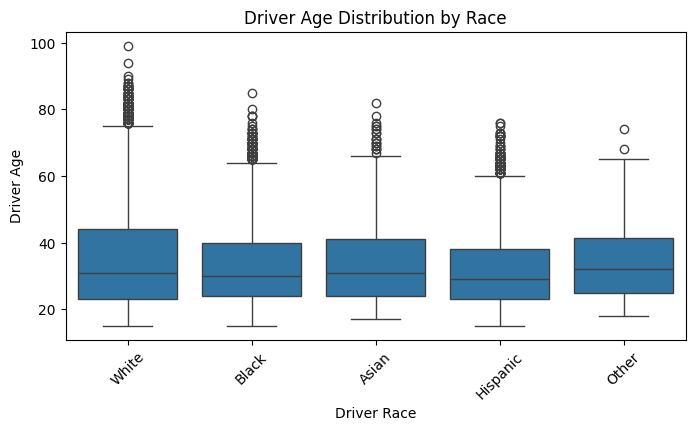

In [12]:
# Driver Age Distribution by Race
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='driver_race', y='driver_age')
plt.title('Driver Age Distribution by Race')
plt.xlabel('Driver Race')
plt.ylabel('Driver Age')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

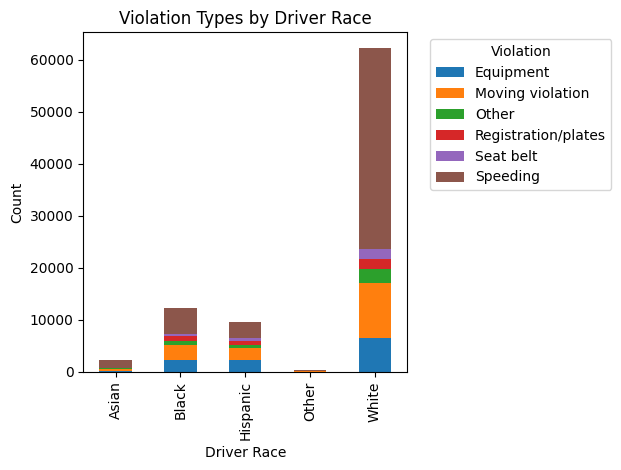

In [13]:
# Violation Types by Driver Race
plt.figure(figsize=(12, 8))
pd.crosstab(df['driver_race'], df['violation']).plot(kind='bar', stacked=True)
plt.title('Violation Types by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.legend(title='Violation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

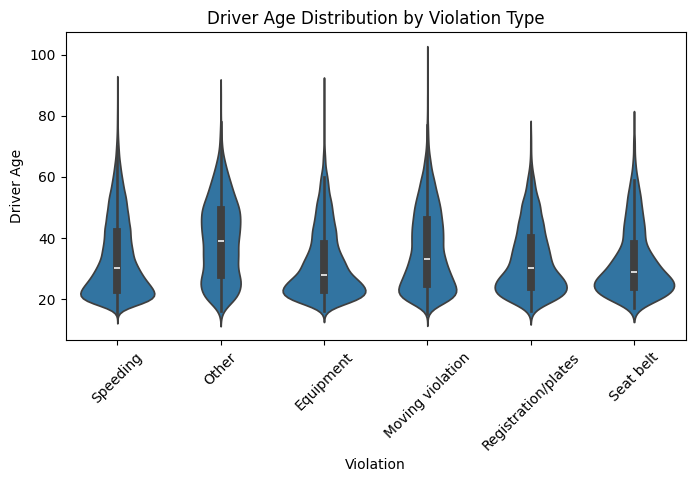

In [14]:
# Driver Age Distribution by Violation Type
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='violation', y='driver_age')
plt.title('Driver Age Distribution by Violation Type')
plt.xlabel('Violation')
plt.ylabel('Driver Age')
plt.xticks(rotation=45)
plt.show()

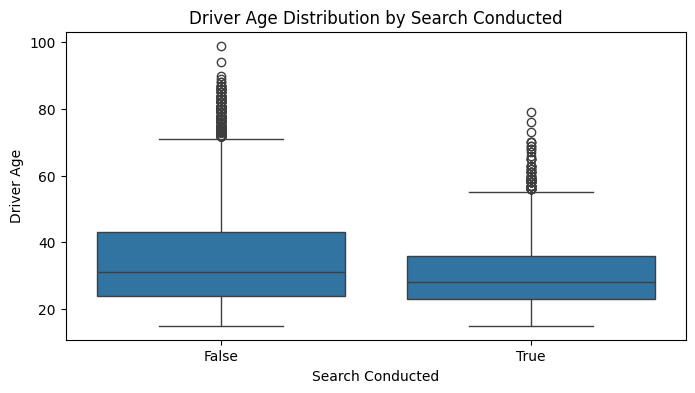

In [15]:
# Driver Age Distribution by Search Conducted
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='search_conducted', y='driver_age')
plt.title('Driver Age Distribution by Search Conducted')
plt.xlabel('Search Conducted')
plt.ylabel('Driver Age')
plt.show()

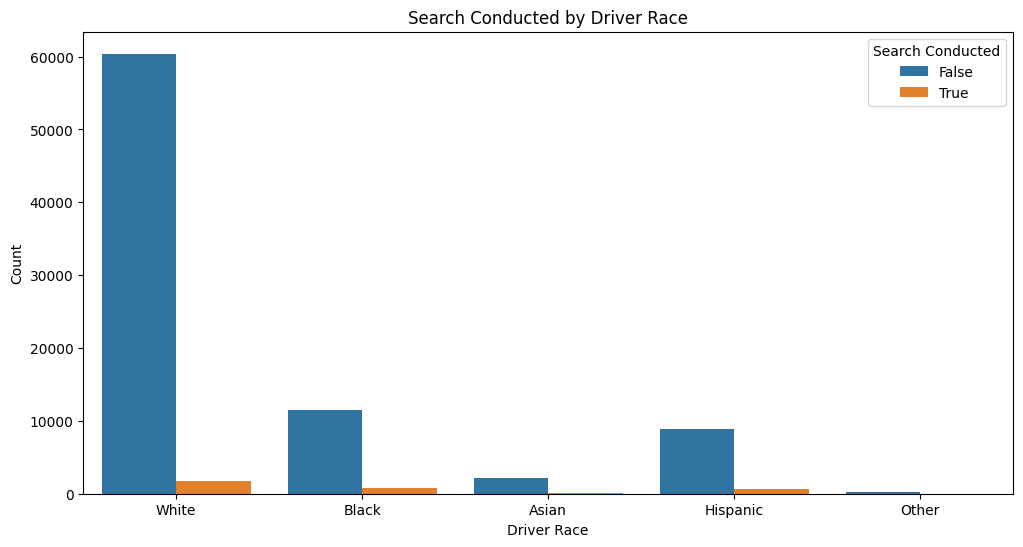

In [16]:
# Search Conducted by Driver Race
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='driver_race', hue='search_conducted')
plt.title('Search Conducted by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Count')
plt.legend(title='Search Conducted')
plt.show()

             count      mean
age_group                   
Young        28884  0.044904
Young Adult  24177  0.043347
Adult        15500  0.032452
Middle Aged  11286  0.024366
Senior        6273  0.011159


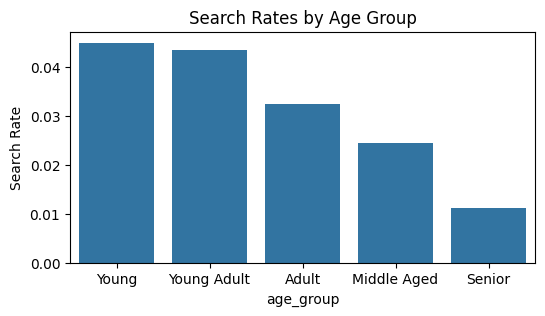

In [17]:
# Search Rates by Age group
age_group_analysis = df.groupby('age_group')['search_conducted'].agg(['count', 'mean'])
print(age_group_analysis)

plt.figure(figsize=(6,3))
sns.barplot(x=age_group_analysis.index, y='mean', data=age_group_analysis)
plt.title('Search Rates by Age Group')
plt.ylabel('Search Rate')
plt.show()

<Axes: xlabel='driver_age', ylabel='Density'>

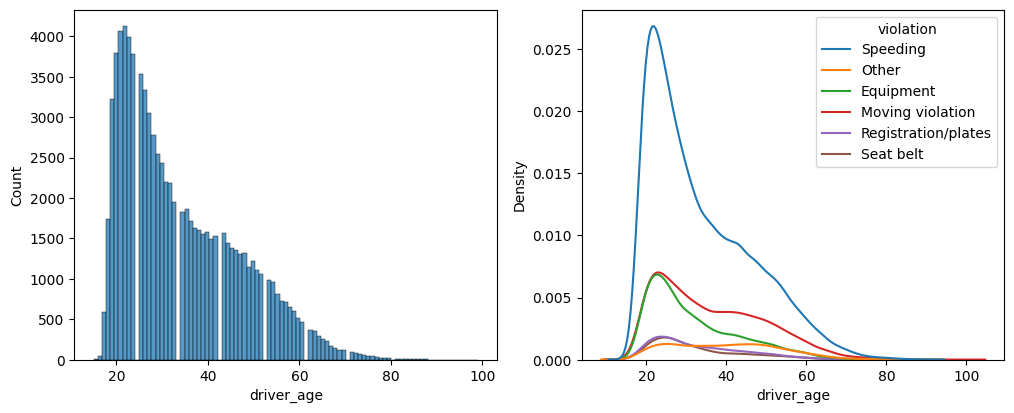

In [18]:
#Compare the age distributions for each violation
df.groupby("violation").driver_age.describe()
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='driver_age', data=df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='driver_age', hue='violation', data=df)

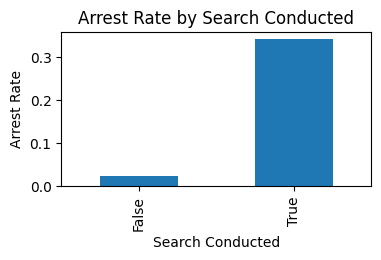

In [19]:
# Search rate and arrest
search_outcome = df.groupby('search_conducted')['is_arrested'].mean()
plt.figure(figsize=(4, 2))
search_outcome.plot(kind='bar')
plt.title('Arrest Rate by Search Conducted')
plt.xlabel('Search Conducted')
plt.ylabel('Arrest Rate')
plt.show()

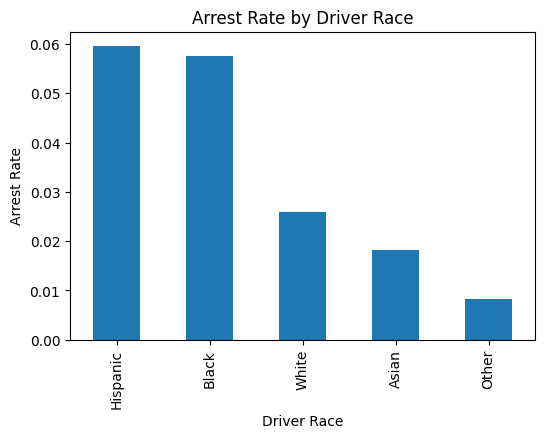

In [20]:
# Arrest rate by driver race
arrest_rate = df.groupby('driver_race')['is_arrested'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
arrest_rate.plot(kind='bar')
plt.title('Arrest Rate by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Arrest Rate')
plt.show()

<Figure size 800x400 with 0 Axes>

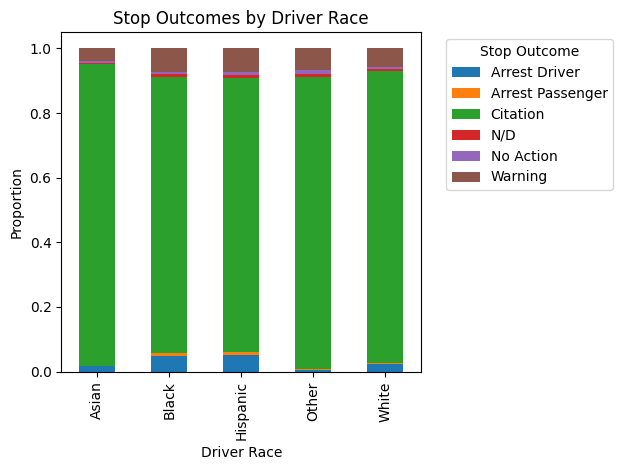

In [21]:
outcomes = df.groupby(['driver_race', 'stop_outcome']).size().unstack()
proportions = outcomes.div(outcomes.sum(axis=1), axis=0)


#Stop Outcomes by Driver Race
plt.figure(figsize=(8,4))
proportions.plot(kind='bar', stacked=True)
plt.title('Stop Outcomes by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Proportion')
plt.legend(title='Stop Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

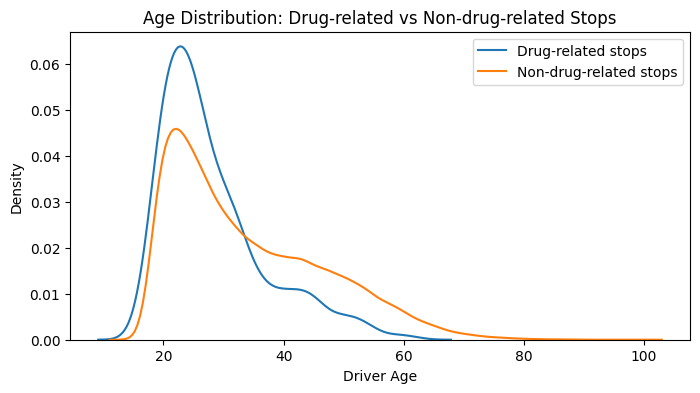

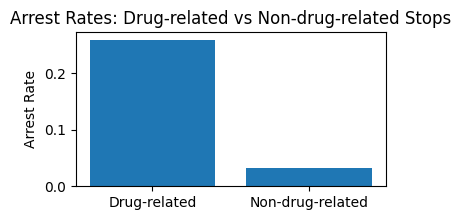

In [22]:
# Characteristics of drug-related stops
drug_stops = df[df['drugs_related_stop'] == True]
non_drug_stops = df[df['drugs_related_stop'] == False]

# Compare age distribution
plt.figure(figsize=(8,4))
sns.kdeplot(data=drug_stops, x='driver_age', label='Drug-related stops')
sns.kdeplot(data=non_drug_stops, x='driver_age', label='Non-drug-related stops')
plt.title('Age Distribution: Drug-related vs Non-drug-related Stops')
plt.xlabel('Driver Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Compare arrest rates
drug_arrest_rate = drug_stops['is_arrested'].mean()
non_drug_arrest_rate = non_drug_stops['is_arrested'].mean()
plt.figure(figsize=(4,2))
plt.bar(['Drug-related', 'Non-drug-related'], [drug_arrest_rate, non_drug_arrest_rate])
plt.title('Arrest Rates: Drug-related vs Non-drug-related Stops')
plt.ylabel('Arrest Rate')
plt.show()



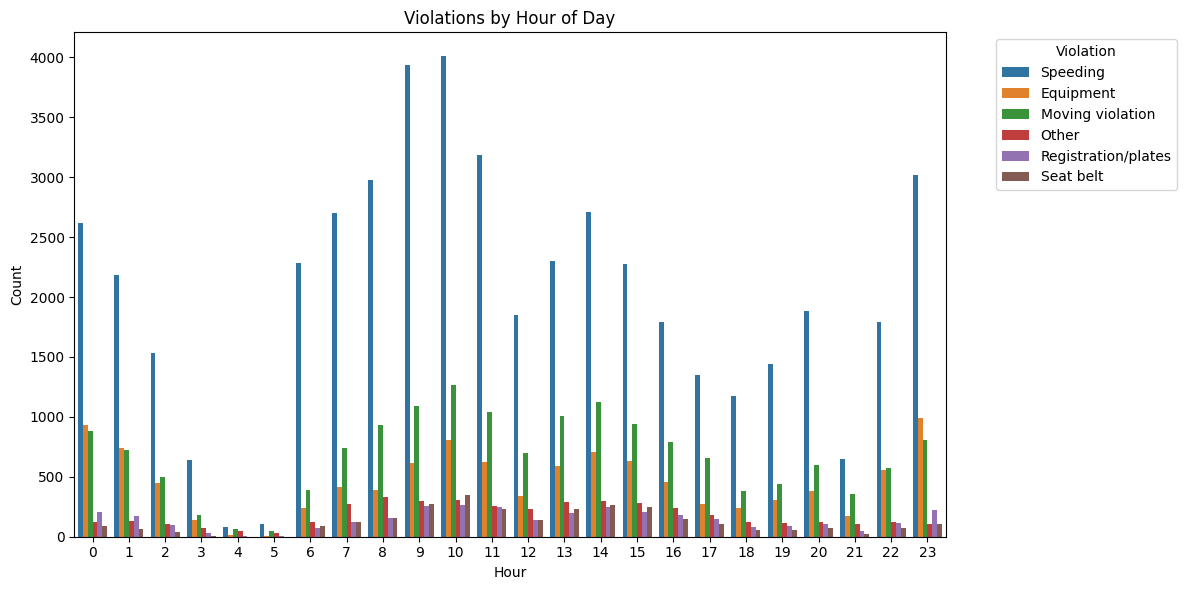

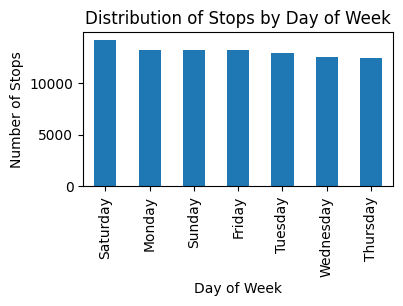

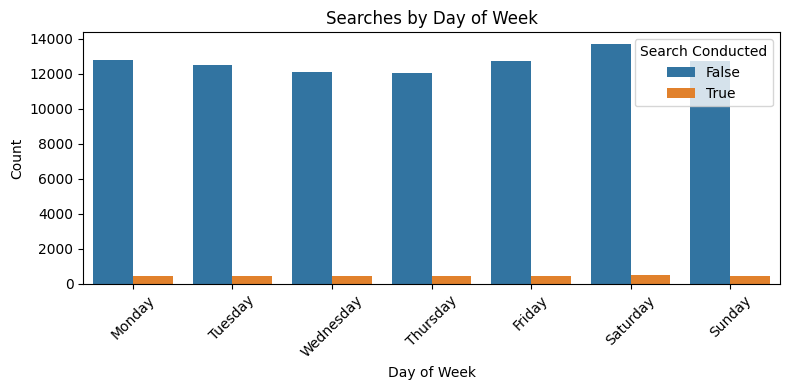

             count      mean
time_of_day                 
Night        12343  0.045694
Morning      33429  0.023632
Afternoon    24220  0.031751
Evening      16528  0.046043


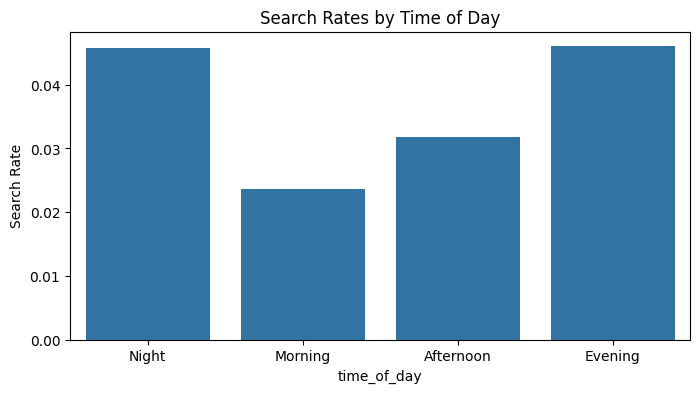

In [26]:
# 7. Time-based Analysis

df['stop_datetime'] = pd.to_datetime(df['stop_date'].astype(str) + ' ' + df['stop_time'].astype(str))
df['hour'] = df['stop_datetime'].dt.hour
df['day_of_week'] = df['stop_datetime'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', hue='violation')
plt.title('Violations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Violation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Stops by day of week
plt.figure(figsize=(4,2))
df['stop_day'].value_counts().plot(kind='bar')
plt.title('Distribution of Stops by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Stops')
plt.show()

# Searches by day of week
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='day_of_week', hue='search_conducted', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Searches by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Search Conducted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#search conducted by time of day
time_of_day_analysis = df.groupby('time_of_day')['search_conducted'].agg(['count', 'mean'])
print(time_of_day_analysis)

plt.figure(figsize=(8,4))
sns.barplot(x=time_of_day_analysis.index, y='mean', data=time_of_day_analysis)
plt.title('Search Rates by Time of Day')
plt.ylabel('Search Rate')
plt.show()


#Additional Analyses


#Search success rate



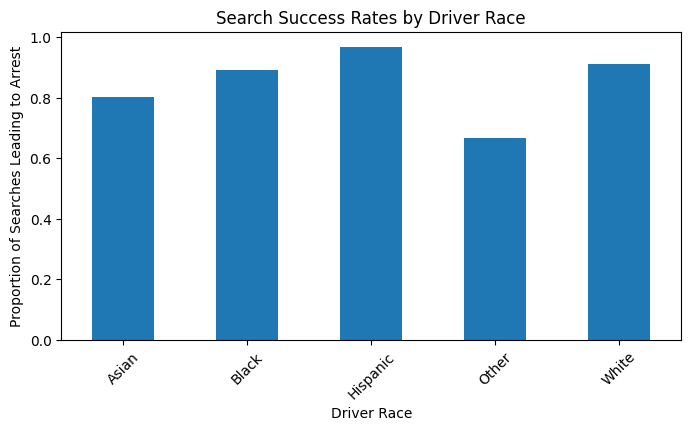

In [27]:

def search_success(group):
    searches = group['search_conducted'].sum()
    if searches == 0:
        return 0
    return group['is_arrested'].sum() / searches

search_success_rates = df.groupby('driver_race').apply(search_success)

plt.figure(figsize=(8, 4))
search_success_rates.plot(kind='bar')
plt.title('Search Success Rates by Driver Race')
plt.xlabel('Driver Race')
plt.ylabel('Proportion of Searches Leading to Arrest')
plt.xticks(rotation=45)
plt.show()

# Monthly trends in Stops and Search Rates


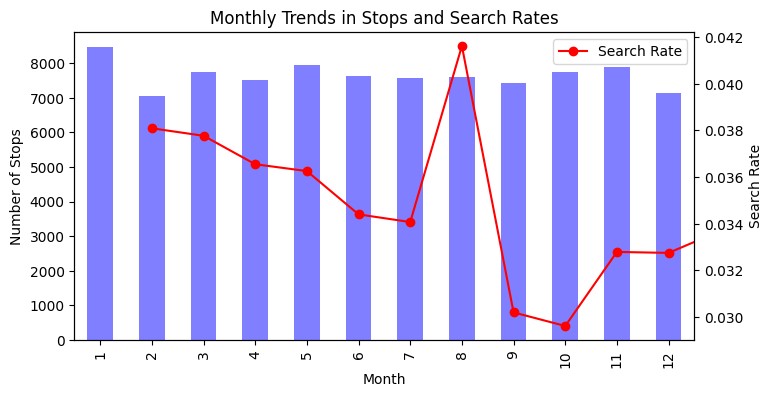

In [28]:
monthly_stops = df.groupby('stop_month')['search_conducted'].agg(['count', 'mean'])
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
monthly_stops['count'].plot(ax=ax1, kind='bar', color='blue', alpha=0.5, label='Number of Stops')
monthly_stops['mean'].plot(ax=ax2, kind='line', color='red', marker='o', label='Search Rate')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Stops')
ax2.set_ylabel('Search Rate')
plt.title('Monthly Trends in Stops and Search Rates')
plt.legend()
plt.show()


#Search Rates: Weekend vs. Weekday




         count      mean
Weekday  64335  0.034305
Weekend  27406  0.036087


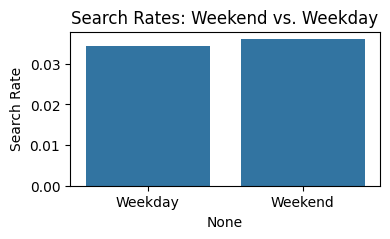

In [ ]:
weekend_comparison = df.groupby('is_weekend')['search_conducted'].agg(['count', 'mean'])
weekend_comparison.index = ['Weekday', 'Weekend']
print(weekend_comparison)

plt.figure(figsize=(4,2))
sns.barplot(x=weekend_comparison.index, y='mean', data=weekend_comparison)
plt.title('Search Rates: Weekend vs. Weekday')
plt.ylabel('Search Rate')
plt.show()

time_of_day     Night   Morning  Afternoon   Evening
driver_race                                         
Asian        0.015228  0.014286   0.024096  0.030488
Black        0.072701  0.048519   0.063974  0.071856
Hispanic     0.064646  0.049706   0.062450  0.071308
Other        0.000000  0.000000   0.033898  0.029412
White        0.041886  0.018252   0.024573  0.041181


<Figure size 800x400 with 0 Axes>

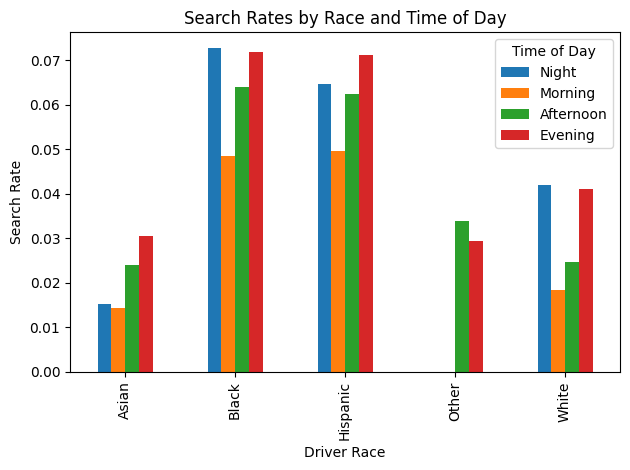

In [30]:
# Search rates by race and time of day
search_rates = df.groupby(['driver_race', 'time_of_day'])['search_conducted'].mean().unstack()
print(search_rates)

plt.figure(figsize=(8,4))
search_rates.plot(kind='bar')
plt.title('Search Rates by Race and Time of Day')
plt.xlabel('Driver Race')
plt.ylabel('Search Rate')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

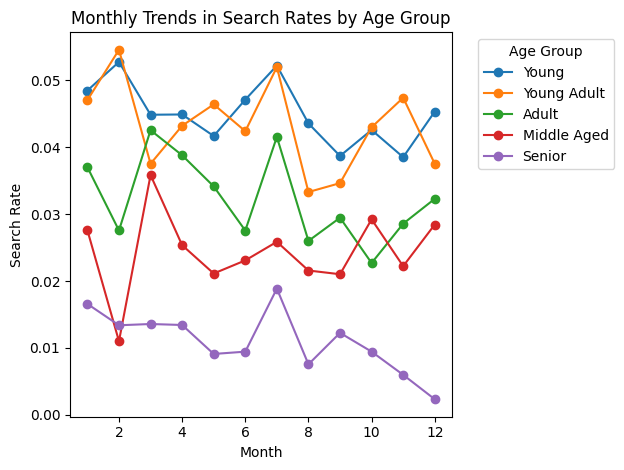

In [31]:
# Trend of search rates over months for different age groups
monthly_age_trends = df.groupby(['stop_month', 'age_group'])['search_conducted'].mean().unstack()

plt.figure(figsize=(14, 8))
monthly_age_trends.plot(marker='o')
plt.title('Monthly Trends in Search Rates by Age Group')
plt.xlabel('Month')
plt.ylabel('Search Rate')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 🚔Do men or women speed more often?

📌 Note:
Responding to this question, we must take consideration of the non-equivalent distribution of the data or use fraction.

In [36]:
print(df.driver_gender.value_counts()) #number of male and female drivers

print(df.driver_gender.value_counts(normalize=True)) #fraction of male and female drivers

driver_gender
M    62895
F    23511
Name: count, dtype: int64
driver_gender
M    0.727901
F    0.272099
Name: proportion, dtype: float64


In [37]:
print(df['violation'].value_counts()) #number of drivers in each violation category
print(df['violation'].value_counts(normalize=True)) #fraction of drivers in each violation category

violation
Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: count, dtype: int64
violation
Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: proportion, dtype: float64


driver_gender
M    32979
F    15482
Name: count, dtype: int64
driver_gender
M    0.680527
F    0.319473
Name: proportion, dtype: float64


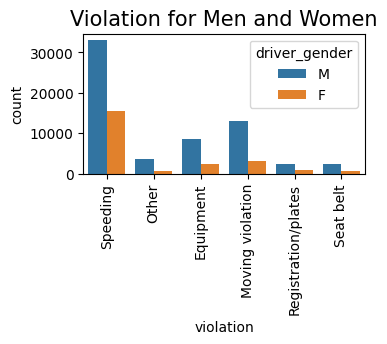

In [41]:
speed_violation = df[df.violation == 'Speeding'] #new df of all the drivers whose violation was speeding
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,4))

print(df[df.violation == 'Speeding'].driver_gender.value_counts()) #number of men and women who were speeding
print(df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)) #fraction of men and women who were speeding

plt.subplot(2, 2, 2)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.title("Violation for Men and Women", fontsize=15)
plt.xticks(rotation=90);

#🚨When a man is pulled over, how often is it for speeding?

violation
Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: count, dtype: int64
violation
Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Violation of Men')

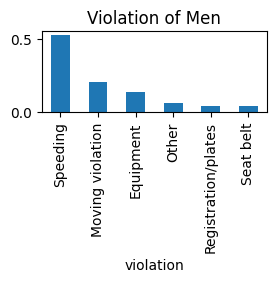

In [43]:
print(df[df.driver_gender == "M"].violation.value_counts())
print(df[df.driver_gender == "M"].violation.value_counts(normalize=True))

plt.subplot(4, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

#🚨 When a women is pulled over, How often is it for speeding?

violation
Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: count, dtype: int64
violation
Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Violation of Women')

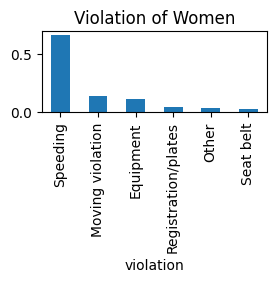

In [44]:
print(df[df.driver_gender == "F"].violation.value_counts())
print(df[df.driver_gender == "F"].violation.value_counts(normalize=True))

plt.subplot(4, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

#🔍 Does gender affect who gets searched during a stop?

In [ ]:
print(df.search_conducted.value_counts())
print(df.search_conducted.value_counts(normalize=True))

search_conducted
False    88545
True      3196
Name: count, dtype: int64
search_conducted
False    0.965163
True     0.034837
Name: proportion, dtype: float64


**From all 88545 stoping cases the data only 3196 are searched.**



In [ ]:
print(df.loc[df.search_conducted, 'driver_gender'].value_counts())
print(df.loc[df.search_conducted, 'driver_gender'].value_counts(normalize=True))

driver_gender
M    2725
F     471
Name: count, dtype: int64
driver_gender
M    0.852628
F    0.147372
Name: proportion, dtype: float64


**From the stopped and searched cases 2725 are men and only 471 are women.**



Text(0.5, 1.0, 'Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)')

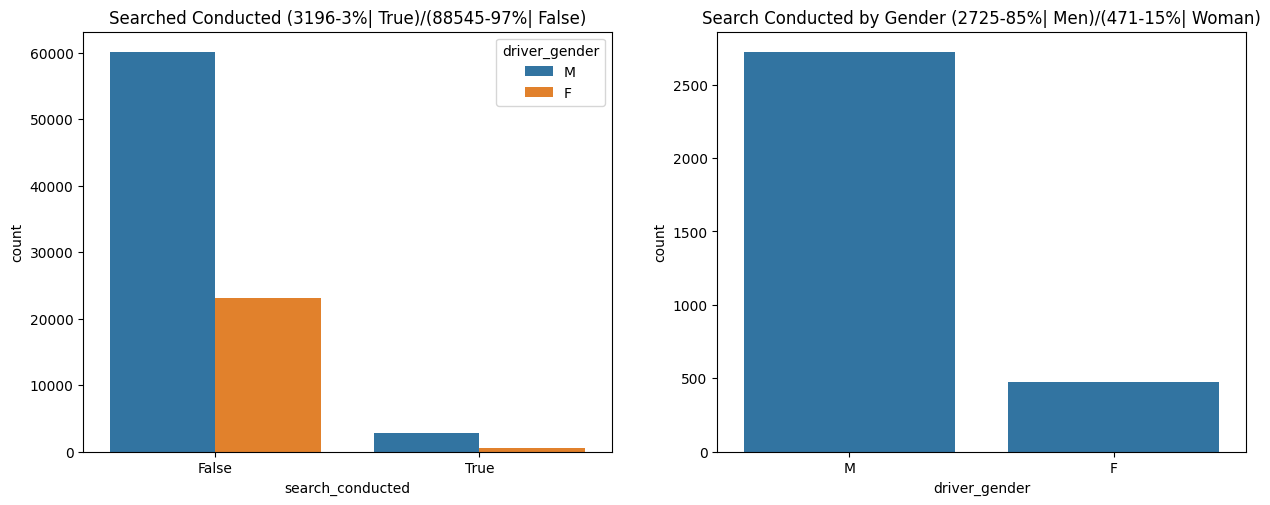

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='search_conducted', hue='driver_gender', data=df)
plt.title("Searched Conducted (3196-3%| True)/(88545-97%| False)")

plt.subplot(2, 2, 2)
searched = df[df['search_conducted']==True]
sns.countplot(x='driver_gender', data=searched)
plt.title("Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)")

In [ ]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

<Axes: xlabel='search_conducted', ylabel='count'>

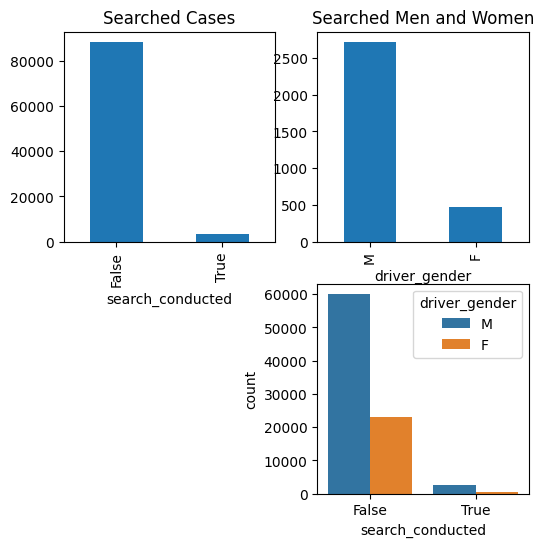

In [46]:
plt.figure(figsize=(6,6))

plt.subplot(2, 2, 1)
df.search_conducted.value_counts().plot(kind="bar")
plt.title("Searched Cases")

plt.subplot(2, 2, 2)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 4)
sns.countplot(x='search_conducted', data=df, hue='driver_gender')

📌Observation: Men are more likely to get searched than women, but correlation does not prove causation


#Which year had the least number of stops?




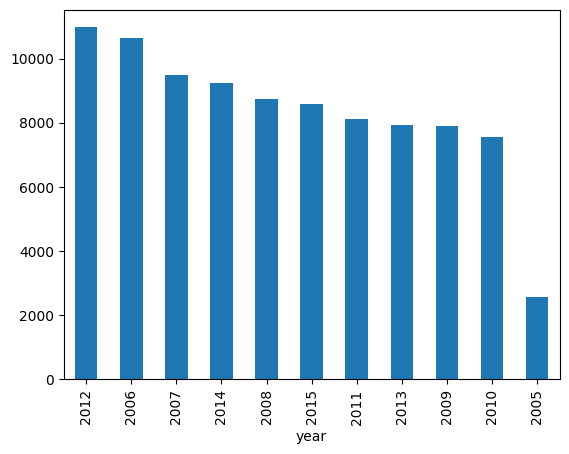

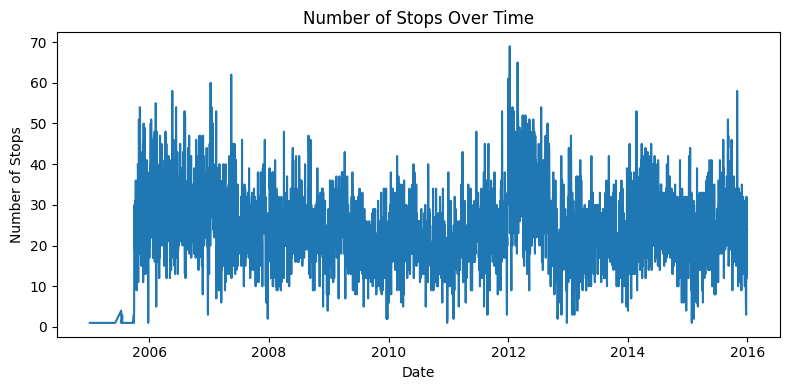

In [47]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df["year"] = df.stop_date.dt.year
df.year.value_counts()
df.year.value_counts().plot(kind="bar")

# Stops over time
plt.figure(figsize=(8,4))

df['stop_datetime'].dt.date.value_counts().sort_index().plot()
plt.title('Number of Stops Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stops')
plt.tight_layout()
plt.show()


#Why is search_type missing so often?

In [48]:
df.search_type.isnull().sum()


88545

In [49]:
df.search_conducted.value_counts()


search_conducted
False    88545
True      3196
Name: count, dtype: int64

In [50]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)

search_type
NaN    88545
Name: count, dtype: int64

Observation: search_type is missing every time the police don't conduct a search.



#During a search, how often is the driver frisked?

<Axes: xlabel='search_type'>

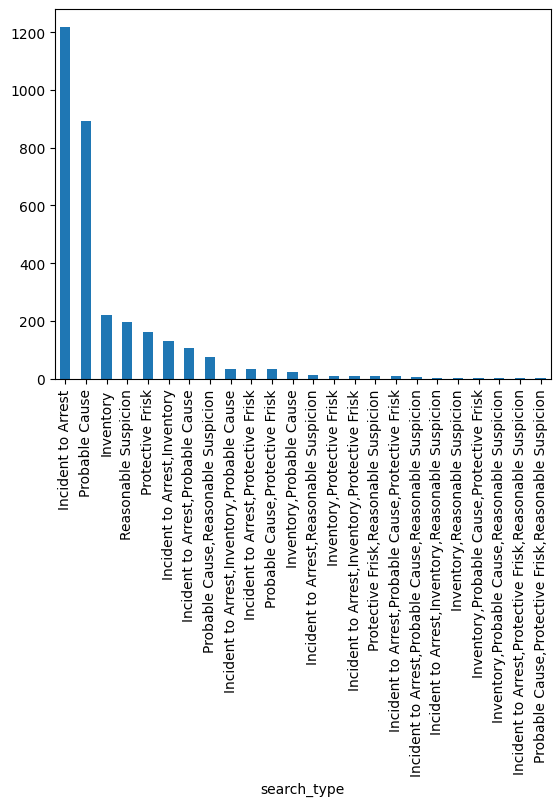

In [51]:
df.search_type.value_counts()
df.search_type.value_counts().plot(kind="bar")


In [52]:
from collections import Counter

st = df.search_type.dropna()

search_count = Counter()
for search in st.str.split(','):
    search_count.update(search)

In [53]:
dict(search_count)


{'Incident to Arrest': 1566,
 'Protective Frisk': 274,
 'Probable Cause': 1182,
 'Reasonable Suspicion': 314,
 'Inventory': 439}

<Axes: xlabel='Search Type'>

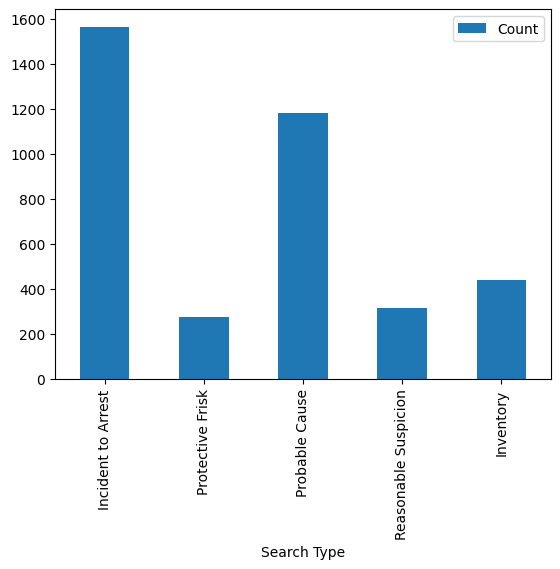

In [54]:
search_count_dict = dict(search_count)
pd.DataFrame(search_count_dict.items(), columns=['Search Type', 'Count']).plot(kind="bar",x='Search Type', y='Count')

In [55]:
df.search_type.str.contains('Protective Frisk').mean()


0.08573216520650813

8.57% of the time the driver is frisked.



#How does drug activity change by time of day?

In [56]:
df["stop_time"] = pd.to_datetime(df.stop_time, format="%H:%M").dt.hour
df.head()
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts()

stop_time
0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
18     22
16     22
21     20
3      20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

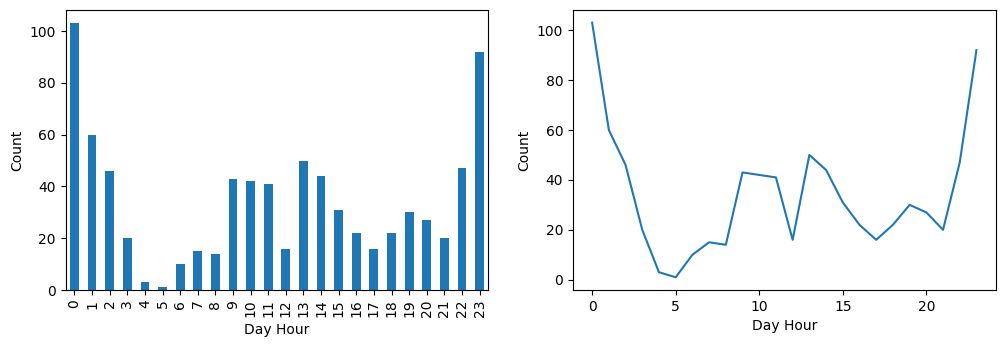

In [57]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().plot(kind="bar")
)
plt.xlabel("Day Hour")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().plot()
)
plt.xlabel("Day Hour")
plt.ylabel("Count")



#Do most stops occur at night?



In [58]:
df.stop_time.sort_index().value_counts()


stop_time
10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: count, dtype: int64

Text(0, 0.5, 'Count')

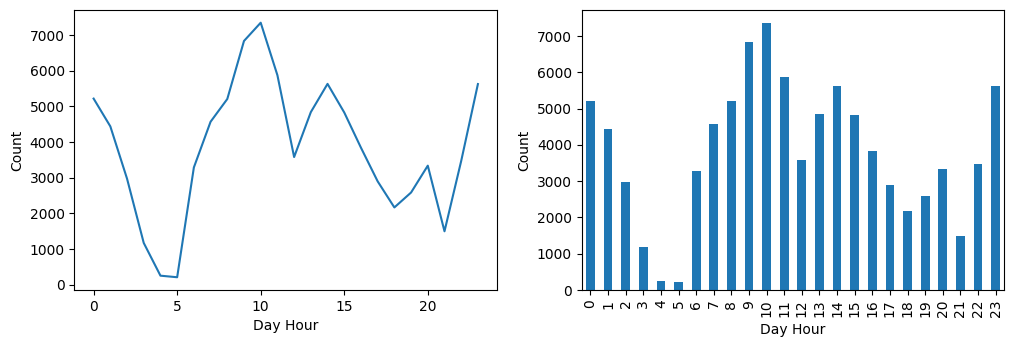

In [59]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df.stop_time.sort_index().value_counts().sort_index().plot()
plt.xlabel("Day Hour")
plt.ylabel("Count")

plt.subplot(2, 2, 2)
df.stop_time.sort_index().value_counts().sort_index().plot(kind="bar")
plt.xlabel("Day Hour")
plt.ylabel("Count")


#Find the bad data in the stop_duration column and fix it



In [60]:
print(f"stop_duration Missing Values: {df.stop_duration.isnull().sum()}")
print(f"stop_duration Unique Values: {df.stop_duration.unique()}")

stop_duration Missing Values: 5333
stop_duration Unique Values: ['0-15 Min' '16-30 Min' '30+ Min' nan '2' '1']


In [ ]:
df.stop_duration.unique()


array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [61]:
df.stop_duration.value_counts(dropna=False)


stop_duration
0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: count, dtype: int64

In [62]:
# ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)
df.loc[(df.stop_duration == '1')| (df.stop_duration == '2'), 'stop_duration'] = np.nan

In [ ]:
df.stop_duration.value_counts(dropna=False)


stop_duration
0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: count, dtype: int64

#What is the mean stop_duration for each violation_raw?

In [63]:
print(f"stop_duration Unique Values: {df.stop_duration.unique()}")

print(f"violation_raw Number of Unique Values: {df.violation_raw.nunique()}")
print(f"violation_raw Unique Values: {df.violation_raw.unique()}")

stop_duration Unique Values: ['0-15 Min' '16-30 Min' '30+ Min' nan]
violation_raw Number of Unique Values: 12
violation_raw Unique Values: ['Speeding' 'Call for Service' 'Equipment/Inspection Violation'
 'Other Traffic Violation' nan 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Violation of City/Town Ordinance'
 'Suspicious Person' 'Motorist Assist/Courtesy' 'Warrant'
 'Seatbelt Violation']


In [64]:
df.violation_raw.value_counts()


violation_raw
Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: count, dtype: int64

In [65]:
df.groupby('stop_duration').violation_raw.value_counts()


stop_duration  violation_raw                   
0-15 Min       Speeding                            41014
               Other Traffic Violation             11763
               Equipment/Inspection Violation       9173
               Seatbelt Violation                   2665
               Registration Violation               2421
               Special Detail/Directed Patrol       1622
               Call for Service                      547
               Violation of City/Town Ordinance      144
               Motorist Assist/Courtesy              119
               APB                                    37
               Suspicious Person                      32
               Warrant                                 6
16-30 Min      Speeding                             6848
               Other Traffic Violation              3150
               Equipment/Inspection Violation       1373
               Registration Violation                804
               Special Detail/Directed P

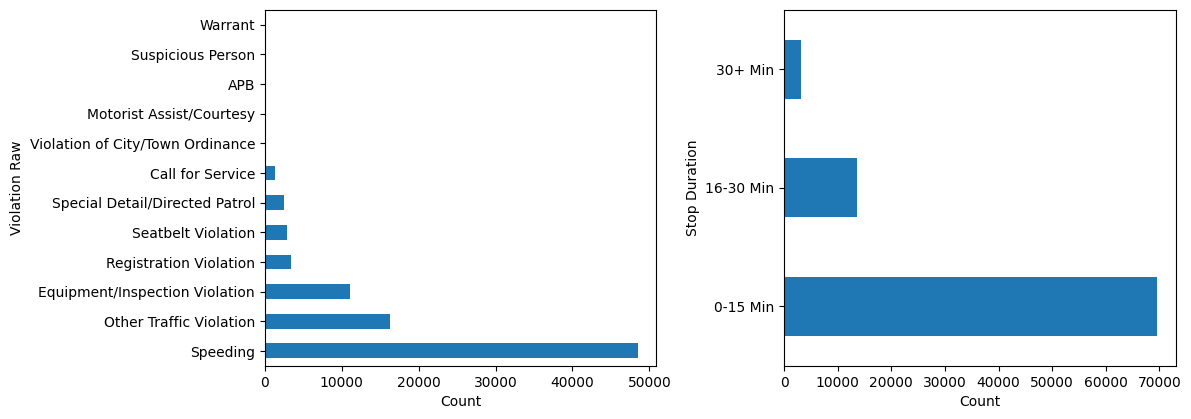

In [66]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['violation_raw'].value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Violation Raw")

plt.subplot(2, 2, 2)
df['stop_duration'].value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Stop Duration")

plt.tight_layout()

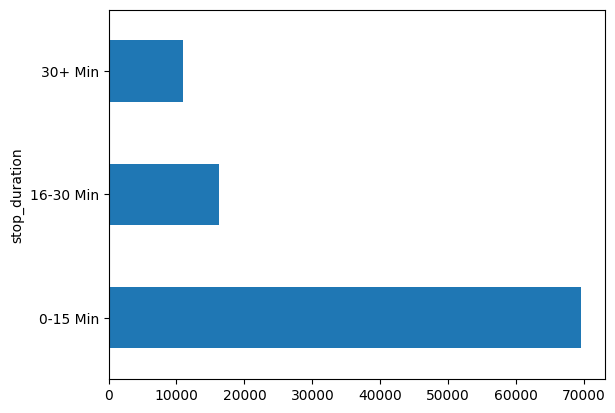

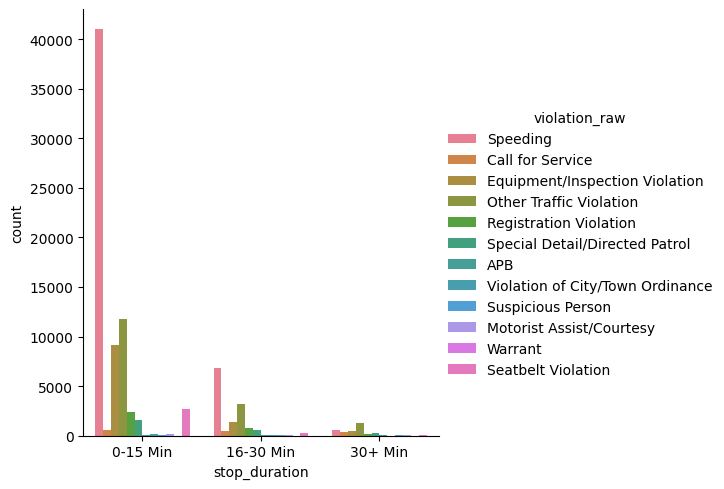

In [67]:
df['violation_raw'].value_counts().plot.barh()
df['stop_duration'].value_counts().plot.barh()
sns.catplot(x="stop_duration", data=df, hue="violation_raw", kind="count")

In [68]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)

In [ ]:
df.stop_minutes.value_counts()


stop_minutes
8.0     69543
23.0    13635
45.0     3228
Name: count, dtype: int64

In [69]:
df.groupby('violation_raw').stop_minutes.mean()


violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [70]:
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])


,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


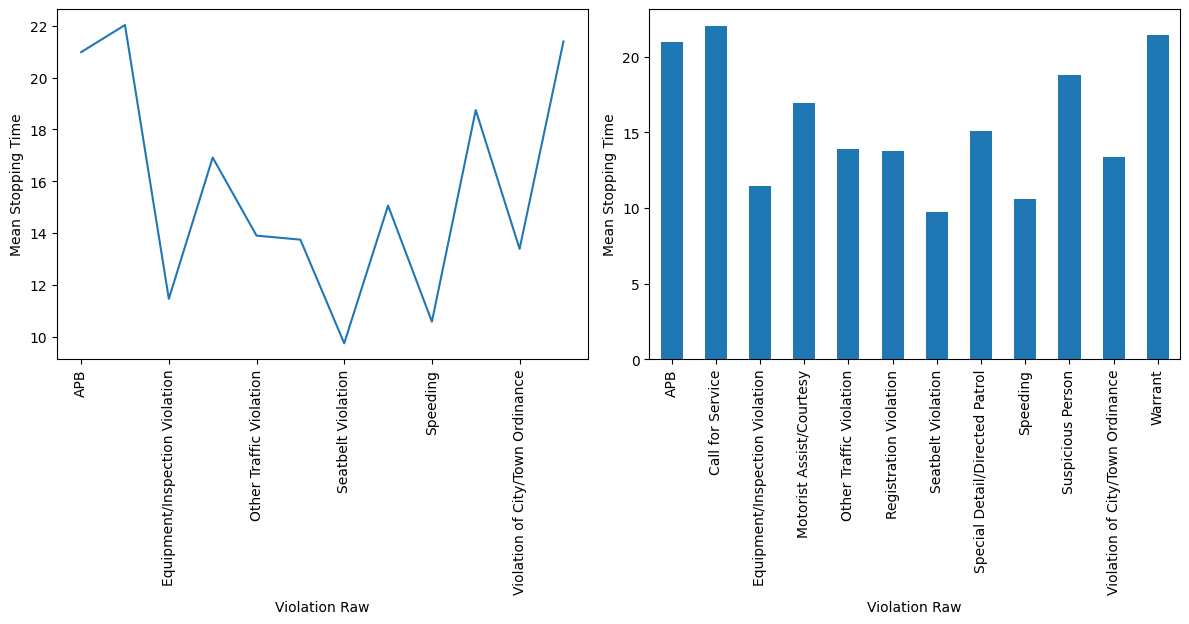

In [71]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df.groupby('violation_raw').stop_minutes.mean().plot(rot=90)
plt.xlabel("Violation Raw")
plt.ylabel("Mean Stopping Time")

plt.subplot(2, 2, 2)
df.groupby('violation_raw').stop_minutes.mean().plot(kind="bar", rot=90)
plt.xlabel("Violation Raw")
plt.ylabel("Mean Stopping Time")

plt.tight_layout()